### Survival Models

This notebook runs a simulation to compare three survival models.

1. Cox Proportional Hazards

2. Random Survival Forests

3. Gradient Boosting Survival Analysis

The data is simulated with different censoring levels (0%, 25%, 50%), and evaluate the results with the following metrics.

- Harrel's Concordance Index

- Uno's Concordance Index

- Cumulative Dynamic AUC

- Integrated Brier Score

In [1]:
from HelperFunctions.EvaluateModels import simulation
from HelperFunctions.PlotResults import plot_results

results = simulation(n_samples=1000, m=3, n_repeats=5, time_points=10)

##### Cox Proportional Hazards Results:

This model shows a declining performance as censoring increases.

(<Figure size 2000x600 with 3 Axes>,
 array([<Axes: title={'center': 'Concordance Index Errors'}, xlabel='Mean Percentage Censoring', ylabel='Concordance'>,
        <Axes: title={'center': 'AUC Comparison: Baseline vs Model'}, xlabel='Mean Percentage Censoring', ylabel='AUC Score'>,
        <Axes: title={'center': 'Integrated Brier Score'}, xlabel='Mean Percentage Censoring', ylabel='Brier Score'>],
       dtype=object))

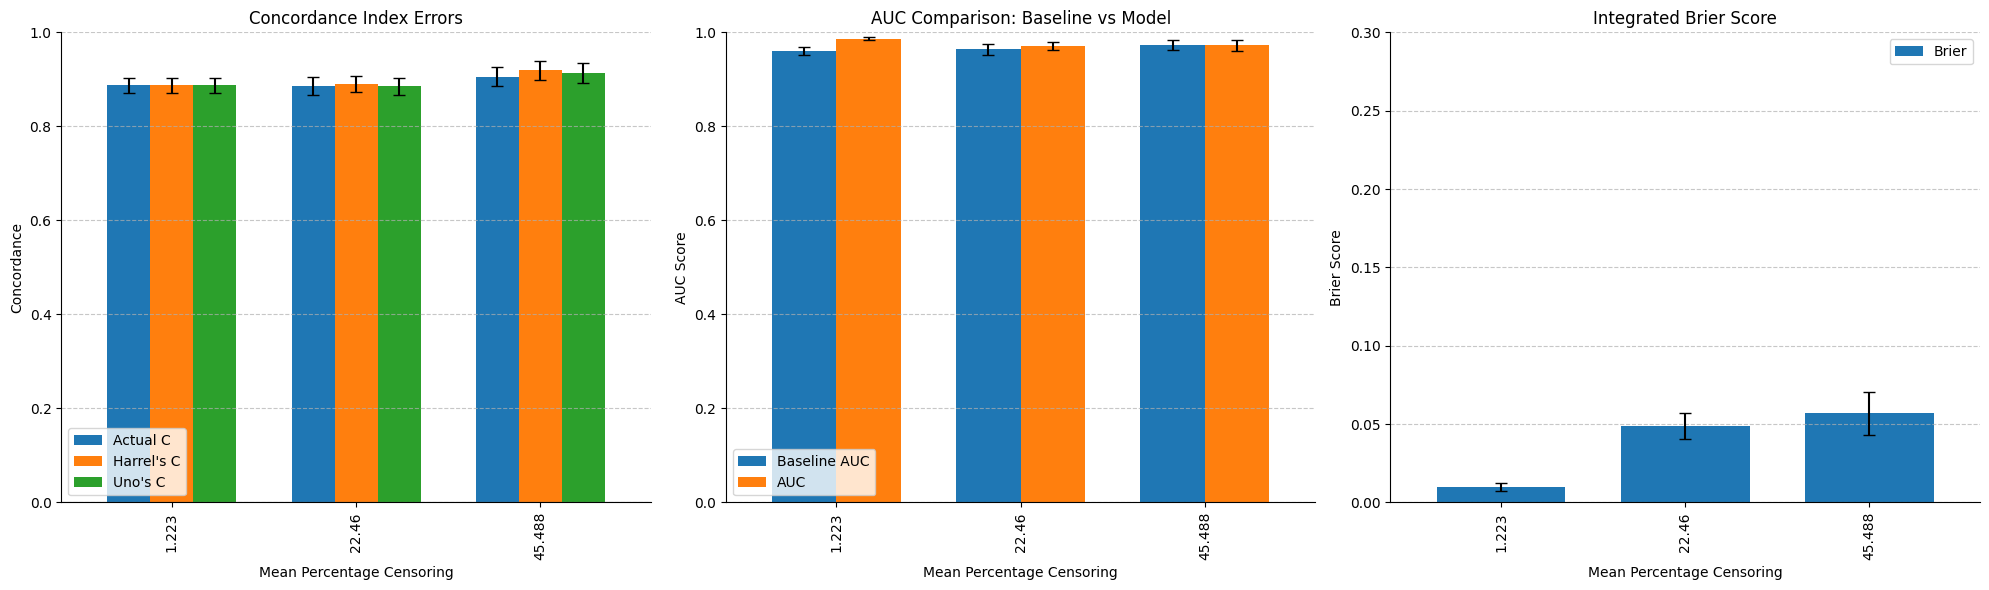

In [2]:
plot_results(results, "cph")

##### Random Survival Forest Results:

This model performs well under moderate censorship.

(<Figure size 2000x600 with 3 Axes>,
 array([<Axes: title={'center': 'Concordance Index Errors'}, xlabel='Mean Percentage Censoring', ylabel='Concordance'>,
        <Axes: title={'center': 'AUC Comparison: Baseline vs Model'}, xlabel='Mean Percentage Censoring', ylabel='AUC Score'>,
        <Axes: title={'center': 'Integrated Brier Score'}, xlabel='Mean Percentage Censoring', ylabel='Brier Score'>],
       dtype=object))

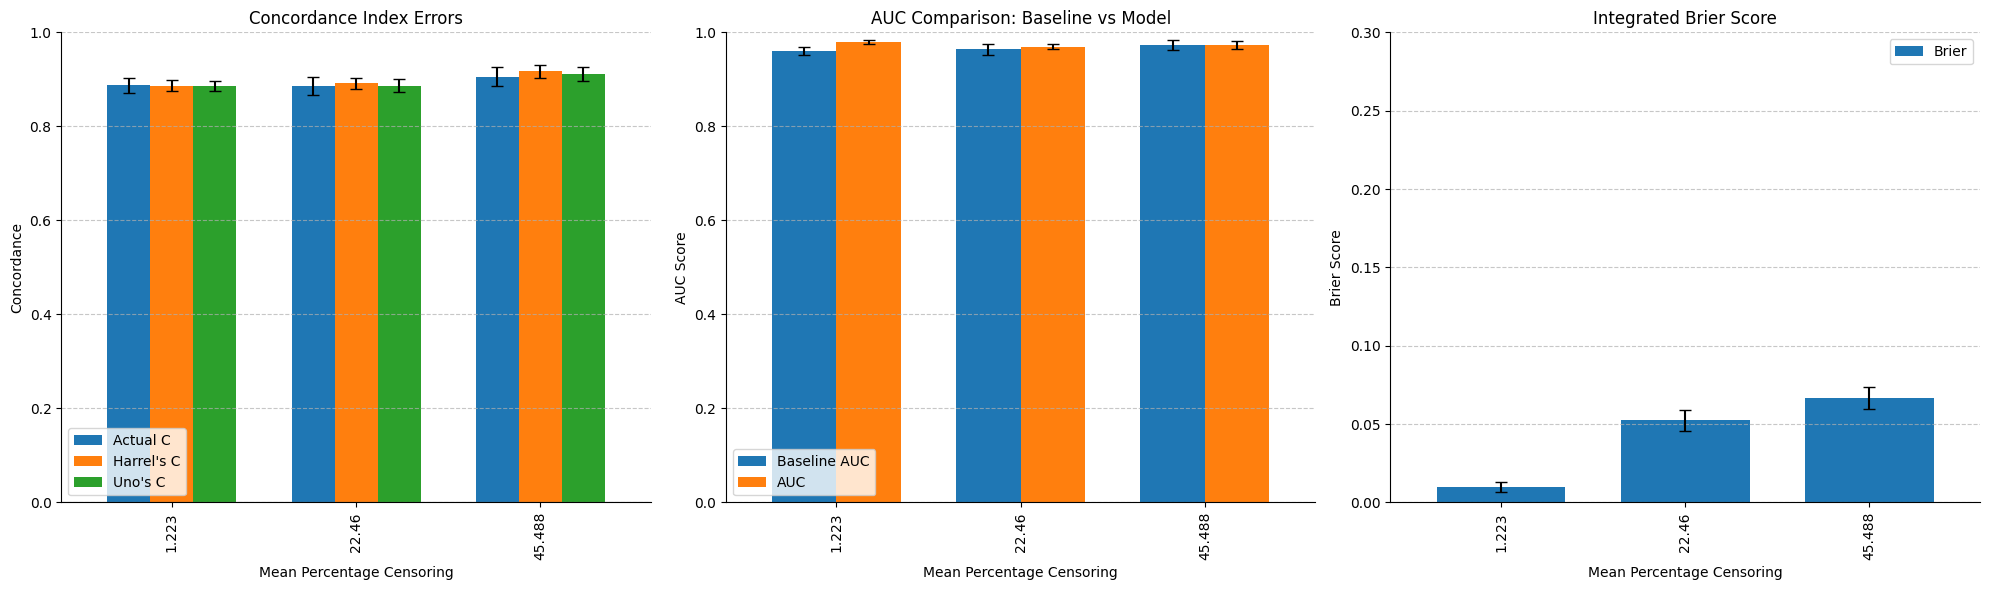

In [3]:
plot_results(results, "rsf")

##### GBSA Results

This model overall performs the best, especially in terms of Brier Score.

(<Figure size 2000x600 with 3 Axes>,
 array([<Axes: title={'center': 'Concordance Index Errors'}, xlabel='Mean Percentage Censoring', ylabel='Concordance'>,
        <Axes: title={'center': 'AUC Comparison: Baseline vs Model'}, xlabel='Mean Percentage Censoring', ylabel='AUC Score'>,
        <Axes: title={'center': 'Integrated Brier Score'}, xlabel='Mean Percentage Censoring', ylabel='Brier Score'>],
       dtype=object))

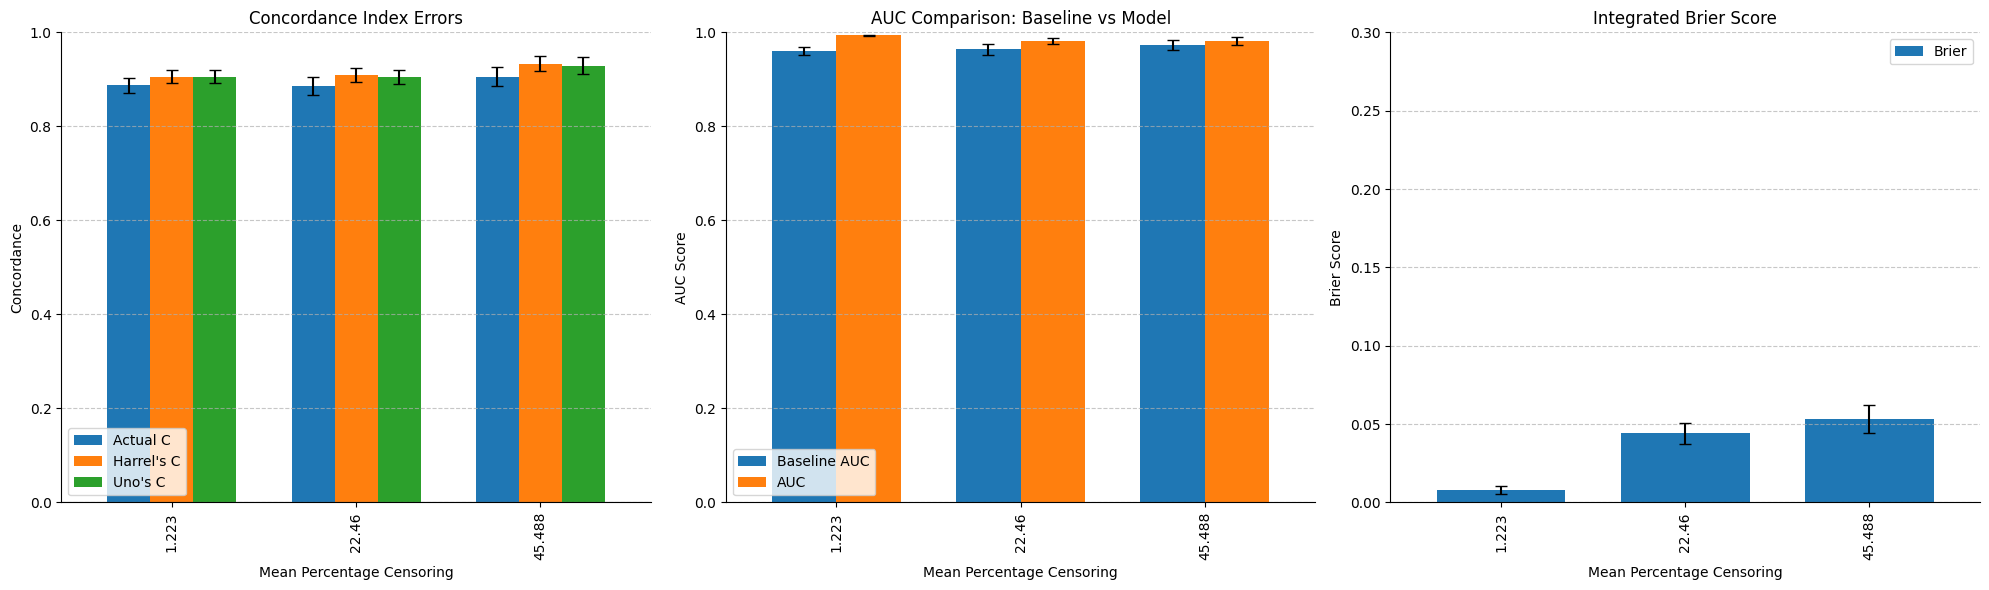

In [4]:
plot_results(results, "gbsa")

##### Numeric Results

In [14]:
rows = []

for model_type in results:
    means = results[model_type]["mean"]

    for i, df in enumerate(means):
        row = df.iloc[0].copy()  
        row["Censoring"] = row["censoring"]
        row["Model"] = model_type.upper()
        rows.append(row.drop("censoring"))

summary_df = pd.DataFrame(rows)
summary_df = summary_df[[
    "Censoring", "Model", "Actual C", "Harrel's C", "Uno's C", 
    "Baseline AUC", "AUC", "Brier"
]]

summary_df

,Censoring,Model,Actual C,Harrel's C,Uno's C,Baseline AUC,AUC,Brier
0,1.222607,CPH,0.887529,0.887230,0.887010,0.959616,0.986115,0.009651
0,22.459919,CPH,0.885622,0.889764,0.885396,0.963500,0.970370,0.048597
0,45.487582,CPH,0.905749,0.918816,0.913419,0.973563,0.972535,0.056979
0,1.222607,RSF,0.887529,0.886688,0.886435,0.959616,0.979189,0.009934
0,22.459919,RSF,0.885622,0.891661,0.886716,0.963500,0.969793,0.052408
0,45.487582,RSF,0.905749,0.916752,0.910899,0.973563,0.972335,0.066406
0,1.222607,GBSA,0.887529,0.905738,0.905575,0.959616,0.993315,0.007713
0,22.459919,GBSA,0.885622,0.908870,0.905594,0.963500,0.981614,0.044058
0,45.487582,GBSA,0.905749,0.932776,0.929285,0.973563,0.981933,0.053175
